## matplotlib formatting charts

In [15]:
import ast 
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  # This converts the string representation to an actual list

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [17]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [18]:
df['job_schedule_type'].value_counts()


job_schedule_type
Full-time                                701727
Contractor                                34793
Internship                                 8742
Part-time                                  7881
Full-time and Part-time                    6287
Full-time and Temp work                    2603
Full-time and Internship                   2340
Full-time and Contractor                   2292
Contractor and Temp work                   2283
Temp work                                  2169
Full-time, Part-time, and Internship        264
Part-time and Internship                    255
Temp work and Internship                    211
Full-time, Contractor, and Temp work        194
Full-time, Temp work, and Internship        173
Part-time and Contractor                    160
Full-time, Part-time, and Temp work         131
Full-time, Part-time, and Contractor        119
Part-time and Temp work                     111
Pekerjaan tetap                              59
Volunteer             

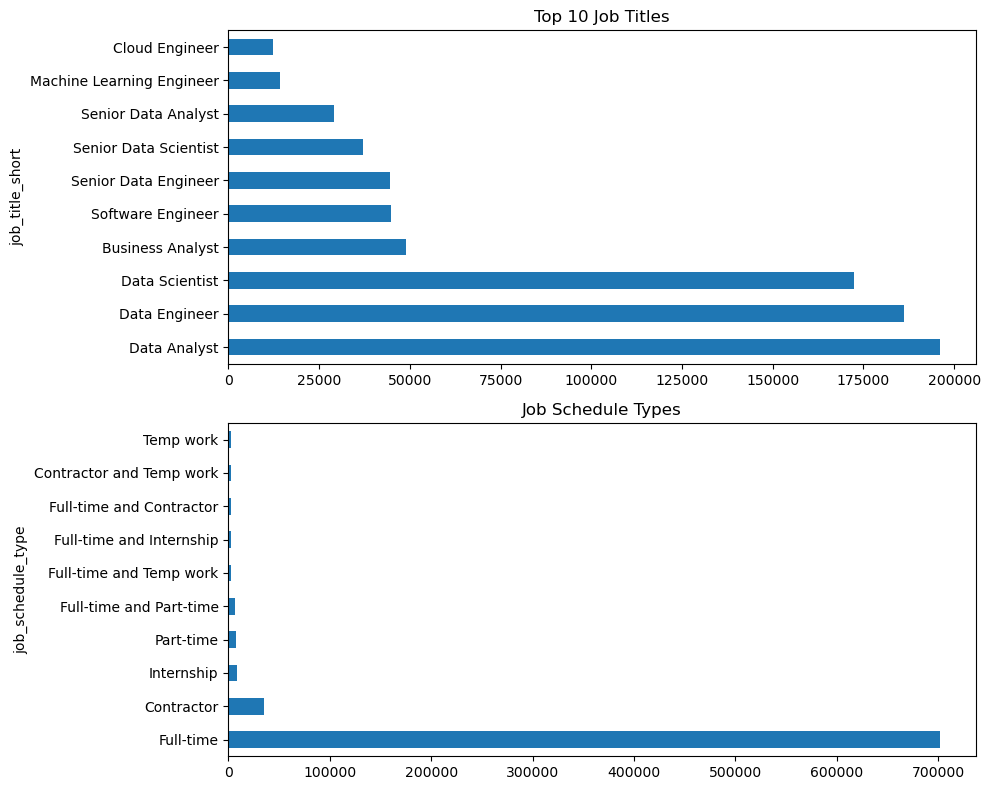

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
df['job_title_short'].value_counts().head(10).plot(kind='barh', ax=ax[0], title='Top 10 Job Titles')
df['job_schedule_type'].value_counts().head(10).plot(kind='barh', ax=ax[1], title='Job Schedule Types')
plt.tight_layout()


## the plots we want to merge

In [20]:
df_exploded = df.explode('job_skills')

In [21]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
skills_count
#type(skills_count)

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [22]:
df_skills_count = skills_count.reset_index(name='skill_count') # converting Series to DataFrame with column name
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


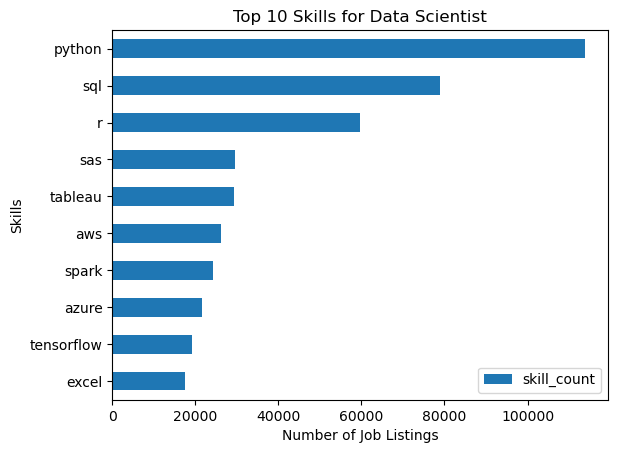

In [23]:
job_title = 'Data Scientist' # specify the job title you want to analyze
top_skills = 10 # specify how many top skills you want to see

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.show()

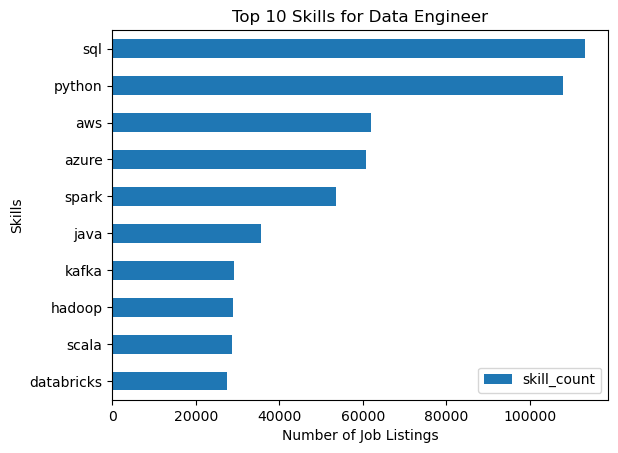

In [24]:
job_title = 'Data Engineer' # specify the job title you want to analyze
top_skills = 10 # specify how many top skills you want to see

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.show()

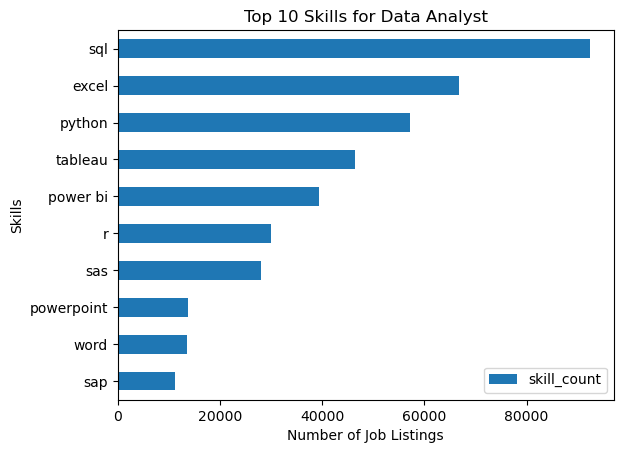

In [25]:
job_title = 'Data Analyst' # specify the job title you want to analyze
top_skills = 10 # specify how many top skills you want to see

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.show()

## merge those three plots


In [26]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

0 Data Scientist
1 Data Engineer
2 Data Analyst


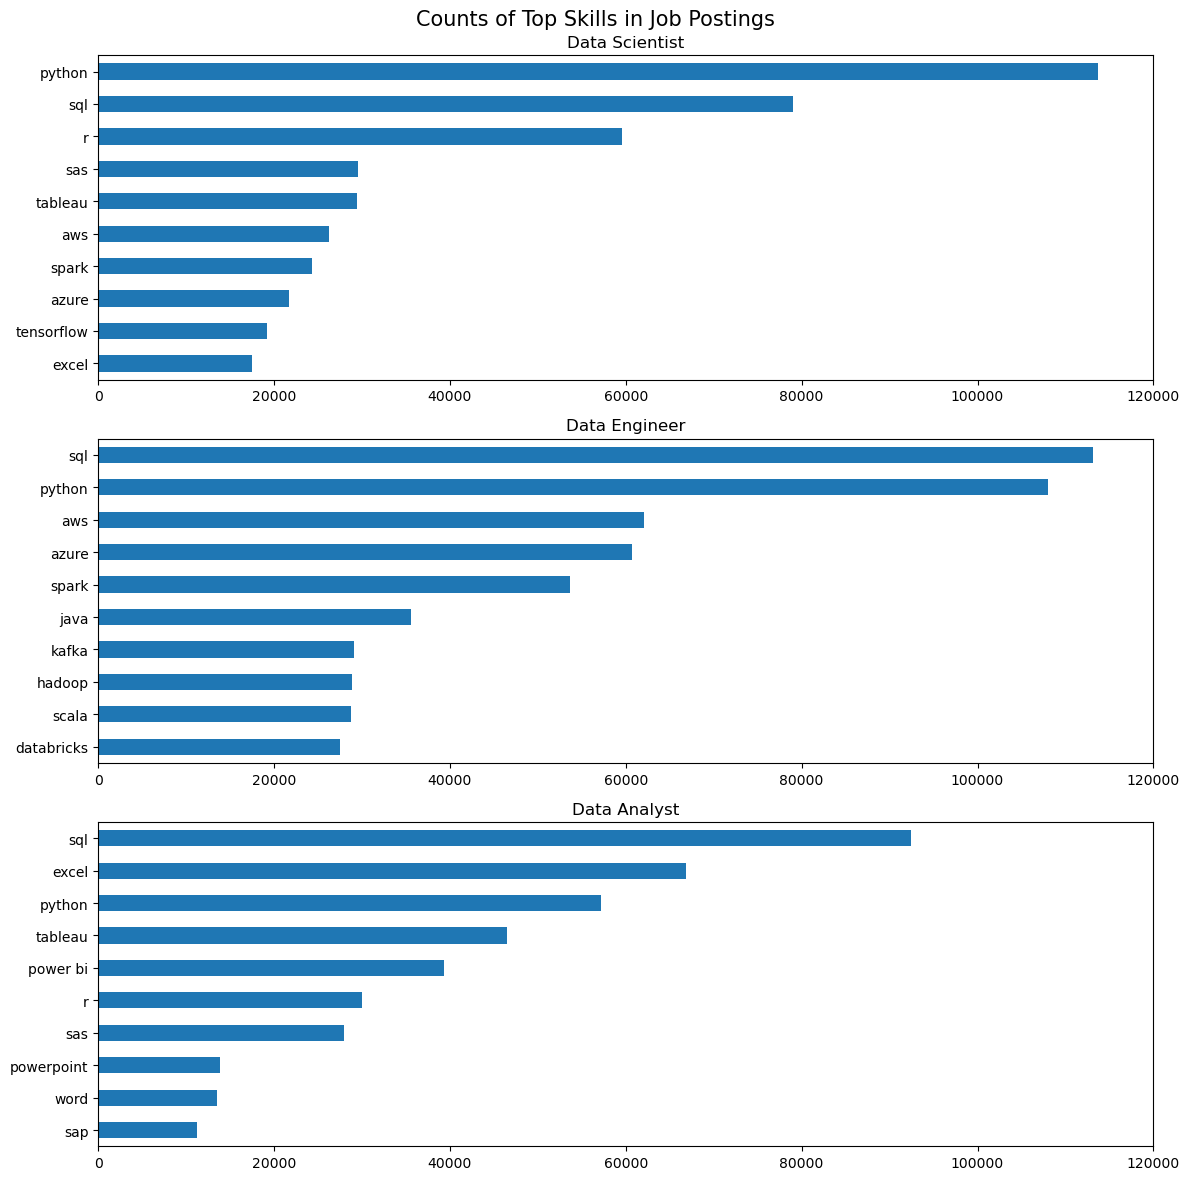

In [35]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

for i, job_title in enumerate(job_titles):
    print(i, job_title)
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(10)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

#✅ Why use enumerate?
#Because sometimes you need both:
#the position (index)
#the item itself
#If you don’t need the index, just loop normally.
#If you need both, use enumerate.


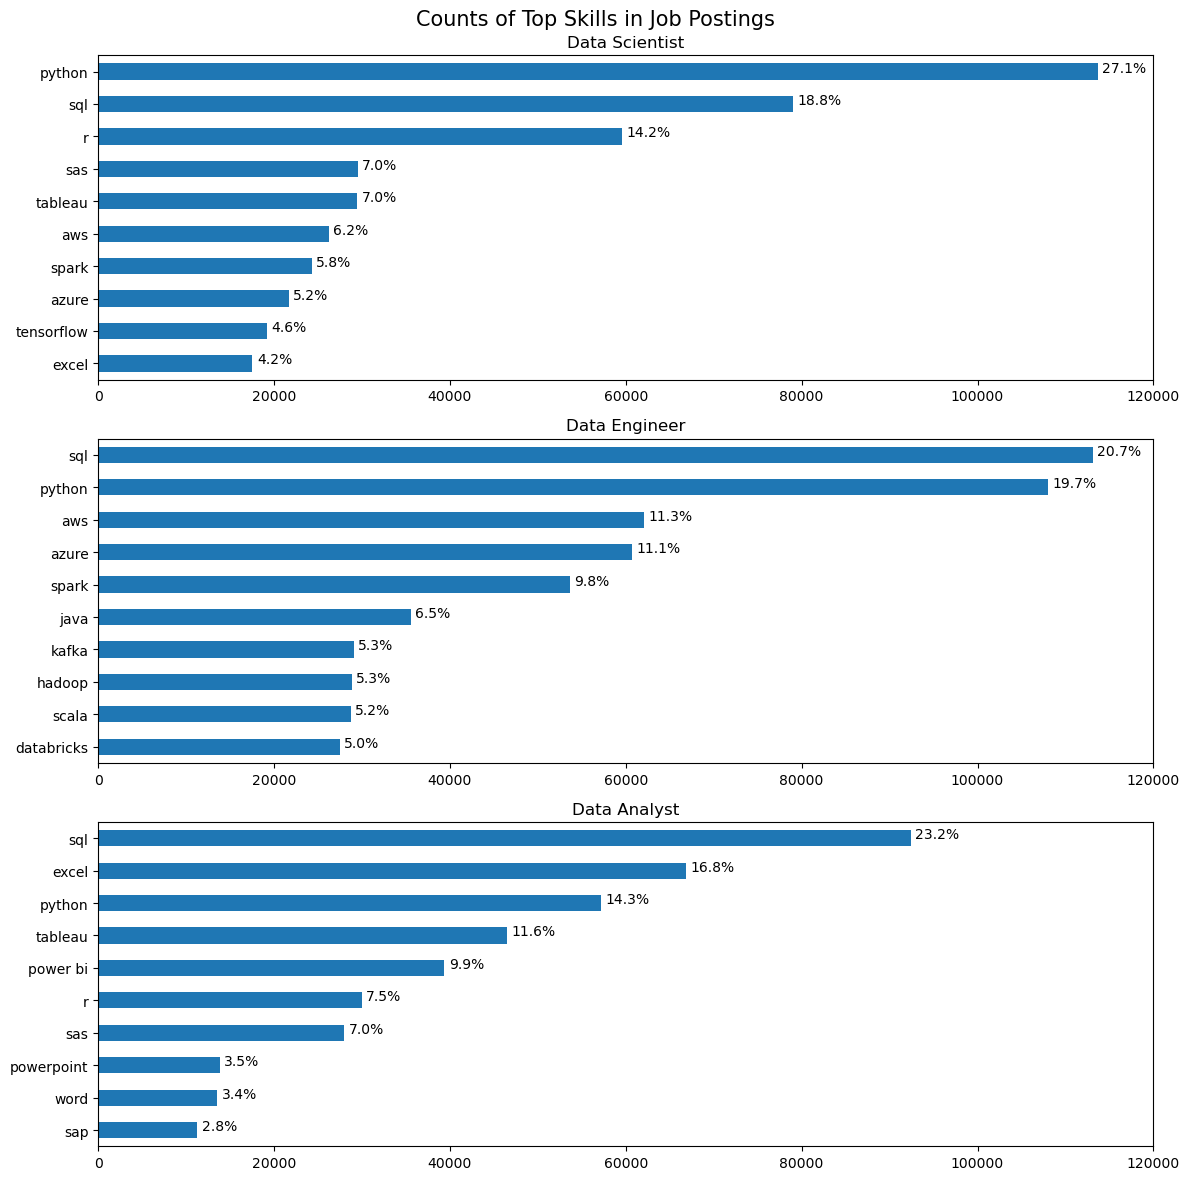

In [37]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(10)

    # Compute percentage
    total = df_plot['skill_count'].sum()
    df_plot['percentage'] = df_plot['skill_count'] / total * 100

    # Plot
    df_plot.plot(
        kind='barh', 
        x='job_skills', 
        y='skill_count', 
        ax=ax[i], 
        title=job_title
    )

    # Invert axis and clean up
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

    # Add percentage labels
    for j, (count, perc) in enumerate(zip(df_plot['skill_count'], df_plot['percentage'])):
        ax[i].text(count + 500, j, f"{perc:.1f}%")

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
